In [1]:
# import neccesary libraries


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the datset

gun_violence_df = pd.read_csv('gun_violence.csv')

In [3]:
gun_violence_df

,Incident_ID,Incident_Date,State,City,Address,Killed,Injured
0,2335052,20-Jun-22,New York,New York (Manhattan),5th Ave and W 139th St,1,8
1,2334620,19-Jun-22,South Carolina,Walterboro,1109 Rivers St,2,2
2,2334936,19-Jun-22,Michigan,Detroit,18501 Healy St,1,3
3,2334512,19-Jun-22,Florida,Miami,US-1 and SW 22nd Ave,0,5
4,2334920,19-Jun-22,District of Columbia,Washington,14th St and U St NW,1,3
...,...,...,...,...,...,...,...
1995,1289877,1-Jan-19,South Carolina,Columbia,1709 Decker Blvd,0,5
1996,1289618,1-Jan-19,Florida,Tallahassee,2020 W Pensacola St,0,5
1997,1289686,31-Dec-18,Ohio,Cleveland,4462 Denison Ave,3,2
1998,1288376,29-Dec-18,Ohio,Lima,904 S Main St,1,3


In [4]:
#information about the dataset

gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Incident_ID    2000 non-null   int64 
 1   Incident_Date  2000 non-null   object
 2   State          2000 non-null   object
 3   City           2000 non-null   object
 4   Address        1996 non-null   object
 5   Killed         2000 non-null   int64 
 6   Injured        2000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 109.5+ KB


In [5]:
#total number of rows and column 

gun_violence_df.shape

(2000, 7)

In [6]:
#checking for missing values in the datset

gun_violence_df.isnull().any()

Incident_ID      False
Incident_Date    False
State            False
City             False
Address           True
Killed           False
Injured          False
dtype: bool

In [7]:
#checking how many missing values are in the ADDRESS colum

gun_violence_df.isnull().sum()

Incident_ID      0
Incident_Date    0
State            0
City             0
Address          4
Killed           0
Injured          0
dtype: int64

In [8]:
#replacing the missing rows with "not available", since we cant replace it with a random address

gun_violence_df.Address = gun_violence_df.Address.fillna('not available')

In [9]:
#getting ten random samples from the datset

gun_violence_df.sample(10)

,Incident_ID,Incident_Date,State,City,Address,Killed,Injured
728,2025254,2-Jun-21,Arkansas,Magnolia,Calhoun Rd,0,4
1415,1698868,6-Jun-20,California,Sacramento,Gardendale Rd and 29th St,1,4
646,2052346,3-Jul-21,Illinois,Chicago,1000 block of W 89th St,0,4
557,2084884,7-Aug-21,Virginia,Norfolk,700 block of Granby St,0,4
910,1934225,20-Feb-21,Pennsylvania,Norristown (East Norriton),2912 Swede Rd,1,4
1558,1610240,30-Jan-20,California,Merced,100 block of W 18th St,0,4
257,2213456,16-Jan-22,Georgia,Savannah,1100 Graydon St,1,3
351,2163306,9-Nov-21,New York,Rochester,Clifton St and Jefferson Ave,0,4
118,2289610,27-Apr-22,Texas,San Antonio,3399 Wurzbach Rd,0,5
1306,1725946,5-Jul-20,Missouri,Columbia,Volunteer Dr and Grace Ln,2,3


In [10]:
#checking for duplicates in the datset

gun_violence_df.duplicated().any()

False

In [11]:
#getting total number of gun violence incident

Total_gun_violence_incident = gun_violence_df.Incident_ID.count()

In [12]:
Total_gun_violence_incident

2000

In [13]:
#total number of people killed

Total_number_of_people_killed = gun_violence_df.Killed.sum()

In [14]:
Total_number_of_people_killed

2003

In [15]:
#total number of people injurerd

Total_number_of_people_injured = gun_violence_df.Injured.sum()

In [16]:
Total_number_of_people_injured

8299

In [17]:
#top ten states with most gun violence incident

top_states = gun_violence_df.State.value_counts().head(10)

In [18]:
top_states

Illinois        215
California      158
Texas           147
Louisiana       102
Pennsylvania    100
Florida          94
New York         92
Ohio             79
Georgia          69
Maryland         69
Name: State, dtype: int64

In [19]:
#representation of the top ten states on a barplot

In [20]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

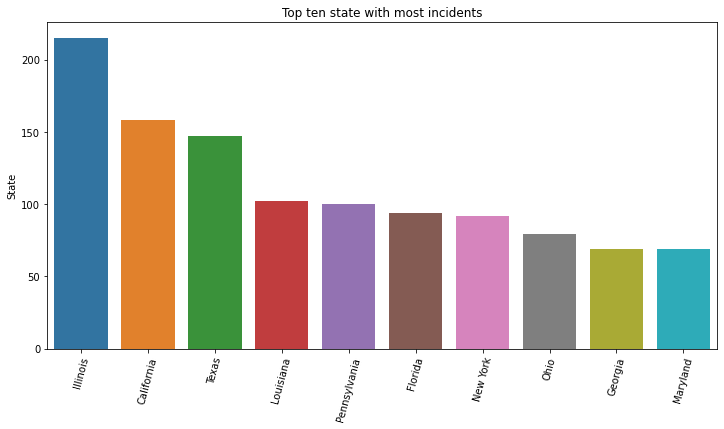

In [21]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Top ten state with most incidents")
sns.barplot(top_states.index, top_states);
plt.show()

In [22]:
#bottom ten states with the least gun violence incident
bottom_states = gun_violence_df.State.value_counts().tail(10)

In [23]:
bottom_states

Alaska           4
West Virginia    4
Montana          2
Utah             2
Idaho            2
Rhode Island     2
South Dakota     2
New Hampshire    1
Maine            1
Wyoming          1
Name: State, dtype: int64

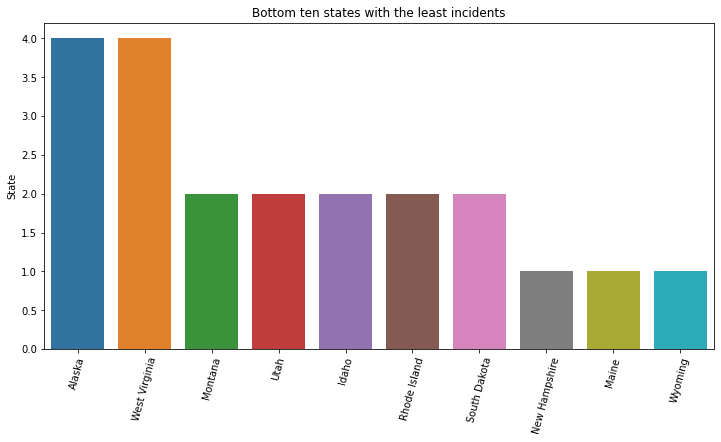

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Bottom ten states with the least incidents")
sns.barplot(bottom_states.index, bottom_states);
plt.show()

In [25]:
#top ten states with most deaths

most_deaths_df = gun_violence_df.sort_values('Killed',ascending=False).head(10)
most_deaths_df[['State', 'Killed']]

,State,Killed
1753,Texas,23
65,Texas,22
1850,Virginia,13
1752,Ohio,10
81,New York,10
867,Colorado,10
741,California,10
824,Indiana,9
1717,Texas,8
875,Georgia,8


<AxesSubplot:xlabel='State'>

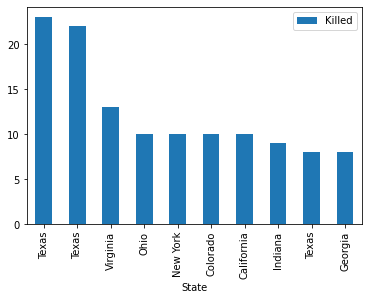

In [26]:
#Top ten states with most death

most_deaths_df.plot(kind='bar',x='State',y='Killed')

In [27]:
#top ten city with most incidents

city_most_incidents = gun_violence_df.City.value_counts().head(10)

In [28]:
city_most_incidents

Chicago         162
Philadelphia     77
Baltimore        48
Houston          43
Washington       35
New Orleans      31
Saint Louis      30
Brooklyn         30
Detroit          28
Atlanta          25
Name: City, dtype: int64

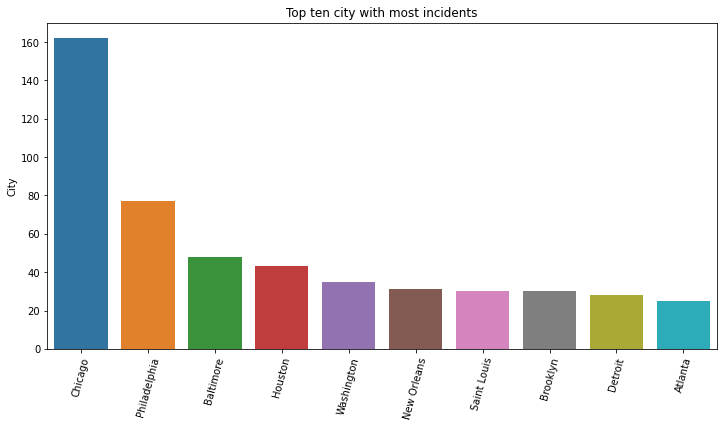

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Top ten city with most incidents")
sns.barplot(city_most_incidents.index, city_most_incidents);
plt.show()

In [30]:
#top five city with the least incidents

city_least_incidents = gun_violence_df.City.value_counts().tail(5)

In [31]:
city_least_incidents

West Jefferson                  1
Inkster                         1
Cleveland (Garfield Heights)    1
Salt Lake City                  1
Lima                            1
Name: City, dtype: int64

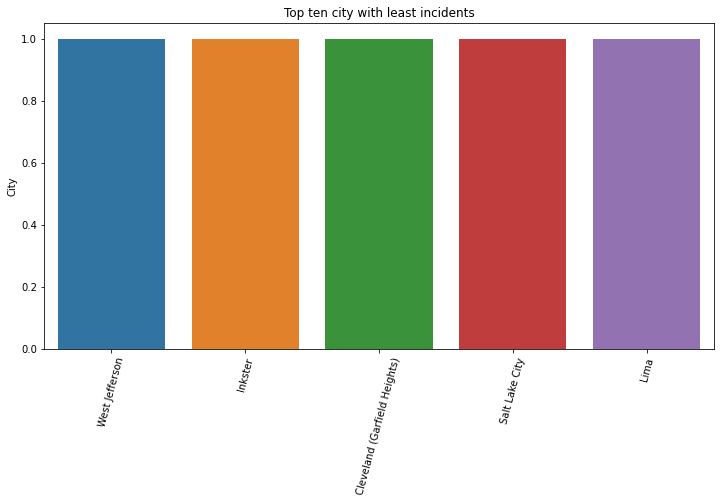

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Top ten city with least incidents")
sns.barplot(city_least_incidents.index, city_least_incidents);
plt.show()

In [33]:
#top five address with most gun violence incidents

address_most_incidents = gun_violence_df.Address.value_counts().head(5)

In [34]:
address_most_incidents

not available                        4
3900 Martin Luther King Jr Ave SW    2
900 block of N Sierra Way            2
1437 St Clair Ave NE                 2
136 Sturges Ave                      2
Name: Address, dtype: int64

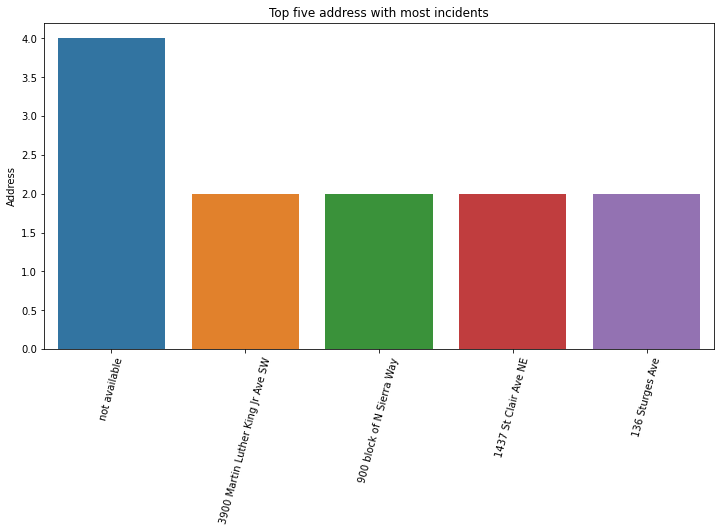

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Top five address with most incidents")
sns.barplot(address_most_incidents.index, address_most_incidents);
plt.show()